# Problem Statement

Machines in factories can fail without warning, which suddenly stops production. These unexpected breakdowns cause delays in delivering products and increase overall operational costs. Emergency repairs are often expensive and unplanned, adding financial pressure. The downtime also leads to loss of productivity and missed deadlines. Overall, such machine failures waste both time and money, making it important to predict and prevent them early.

Objective

Use machine and sensor data to predict failures before they happen.

Reduce machine downtime by planning maintenance early.

Save money by avoiding emergency repairs.

Increase the life of machines and make the factory run more smoothly.

## About Dataset

Machine Predictive Maintenance Classification Dataset Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in the industry to the best of our knowledge.

The dataset consists of 10 000 data points stored as rows with 14 features in columns

UID: unique identifier ranging from 1 to 10000 productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K. rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values. tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a 'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true. Important : There are two Targets - Do not make the mistake of using one of them as feature, as it will lead to leakage. Target : Failure(1) or Not Failure(0)  Type : Type of Failure Acknowledgements UCI : https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collecting 

In [3]:
df = pd.read_csv("predictive_maintenance.csv")


# Exploratory Data Analysis EDA

In [5]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0


In [8]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [13]:
df.sample(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
281,282,L47461,L,298.1,308.0,1626,36.5,83,0,No Failure
6384,6385,H35798,H,300.1,309.6,1463,45.1,113,0,No Failure
7057,7058,L54237,L,300.8,310.6,1666,36.2,144,0,No Failure
1556,1557,H30970,H,298.4,308.5,1398,47.1,122,0,No Failure
8604,8605,L55784,L,297.4,308.2,1297,52.1,211,0,No Failure


In [17]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [21]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [23]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [25]:
df["Failure Type"].value_counts()


Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [27]:
a = df["Target"].value_counts()

C:\Users\soniv\AppData\Local\Temp\ipykernel_11996\1532465906.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(a, palette="Set1")


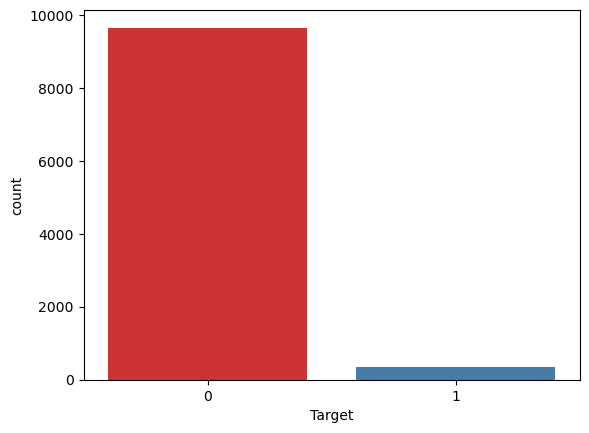

In [29]:
#How many Failure and Not failure Machine
sns.barplot(a, palette="Set1")
plt.show()

C:\Users\soniv\AppData\Local\Temp\ipykernel_11996\1149958681.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(b, palette="Set1")


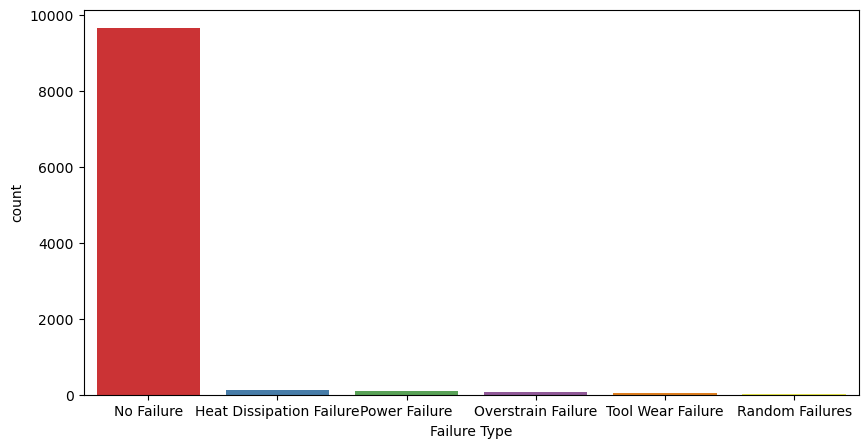

In [31]:
b = df["Failure Type"].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(b, palette="Set1")
plt.show()

C:\Users\soniv\AppData\Local\Temp\ipykernel_11996\2127041776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(c, palette="Set1")


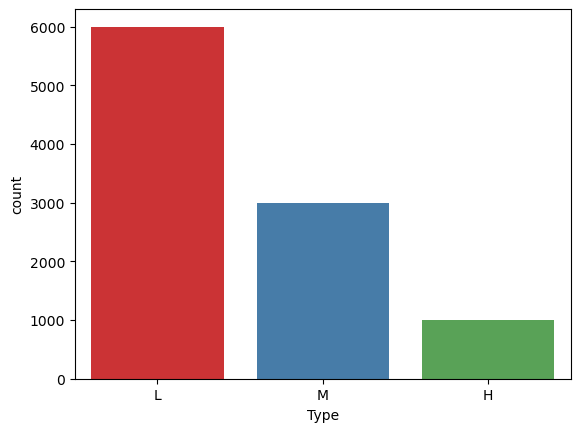

In [33]:
c = df["Type"].value_counts()
sns.barplot(c, palette="Set1")
plt.show()

C:\Users\soniv\AppData\Local\Temp\ipykernel_11996\1972909560.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Target", y = "Air temperature [K]", palette="Set1", data=df)


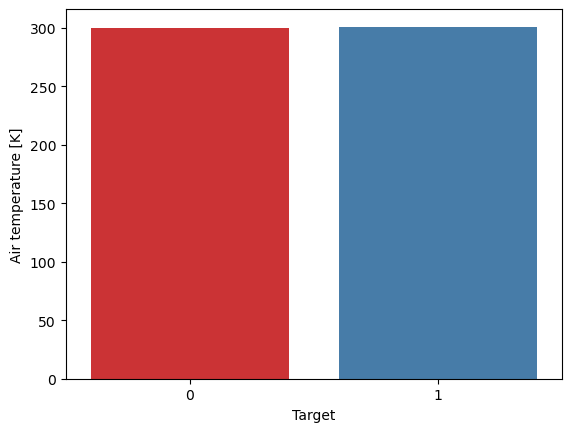

C:\Users\soniv\AppData\Local\Temp\ipykernel_11996\1972909560.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Target", y = "Process temperature [K]", palette="Set1", data=df)


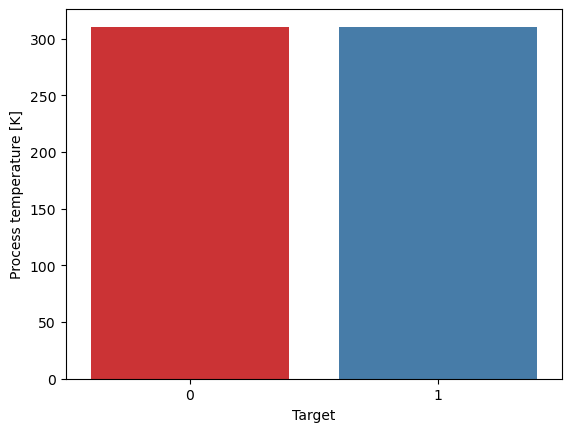

In [35]:
sns.barplot(x="Target", y = "Air temperature [K]", palette="Set1", data=df)
plt.show()
sns.barplot(x="Target", y = "Process temperature [K]", palette="Set1", data=df)
plt.show()

C:\Users\soniv\AppData\Local\Temp\ipykernel_11996\340449053.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Target", y="Rotational speed [rpm]",  palette="Set1", data=df)


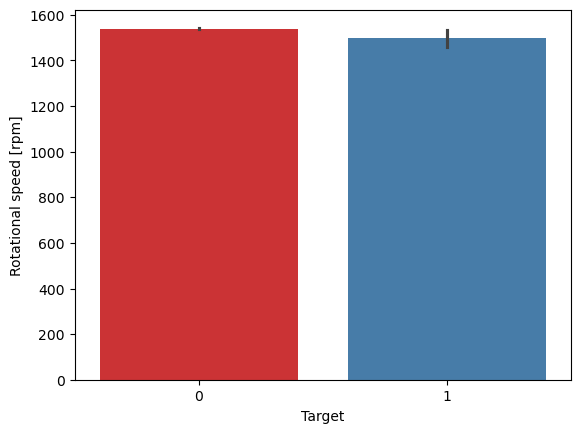

C:\Users\soniv\AppData\Local\Temp\ipykernel_11996\340449053.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Target", y="Torque [Nm]",  palette="Set1", data=df)


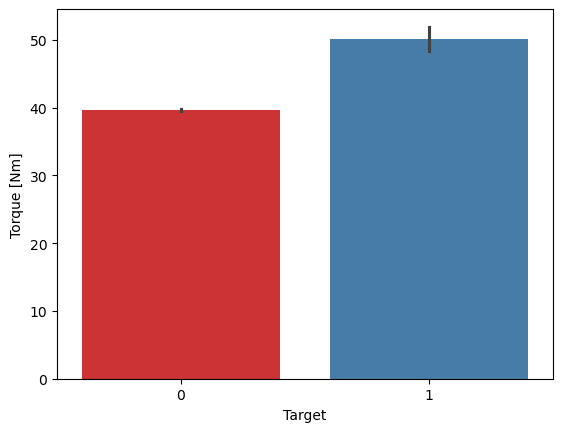

In [36]:
sns.barplot(x="Target", y="Rotational speed [rpm]",  palette="Set1", data=df)
plt.show()
sns.barplot(x="Target", y="Torque [Nm]",  palette="Set1", data=df)
plt.show()

C:\Users\soniv\AppData\Local\Temp\ipykernel_11996\517292685.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Target", y="Tool wear [min]",  palette="Set1", data=df)


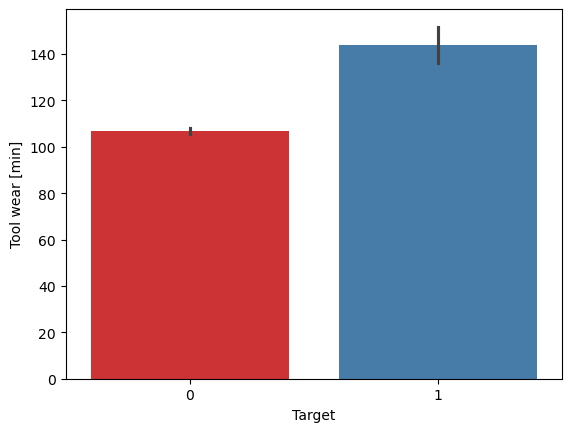

In [39]:
sns.barplot(x="Target", y="Tool wear [min]",  palette="Set1", data=df)
plt.show()

In [41]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

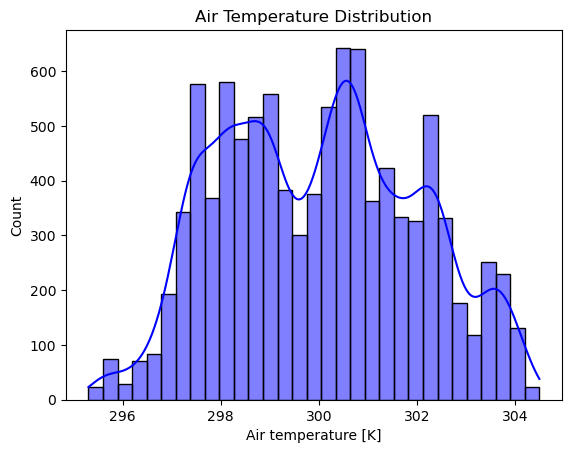

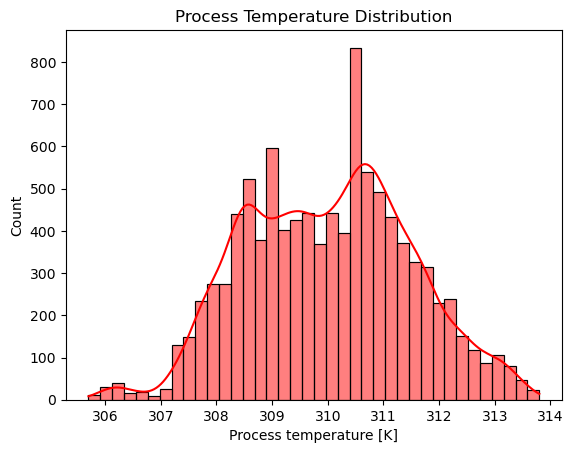

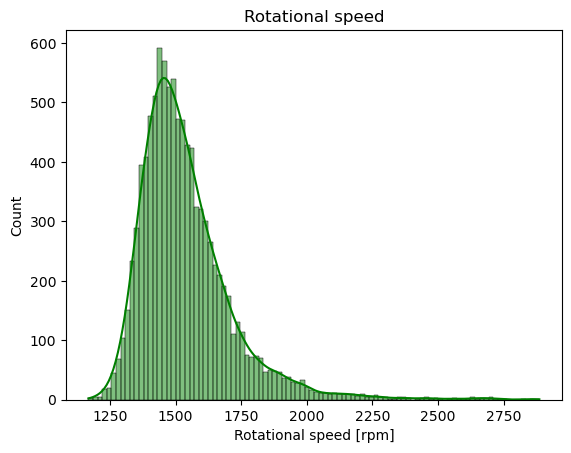

In [43]:
sns.histplot(df["Air temperature [K]"], kde=True, color='blue')
plt.title("Air Temperature Distribution")
plt.show()
sns.histplot(df["Process temperature [K]"], kde=True, color='Red')
plt.title("Process Temperature Distribution")
plt.show()
sns.histplot(df["Rotational speed [rpm]"], kde=True, color='green')
plt.title("Rotational speed")
plt.show()

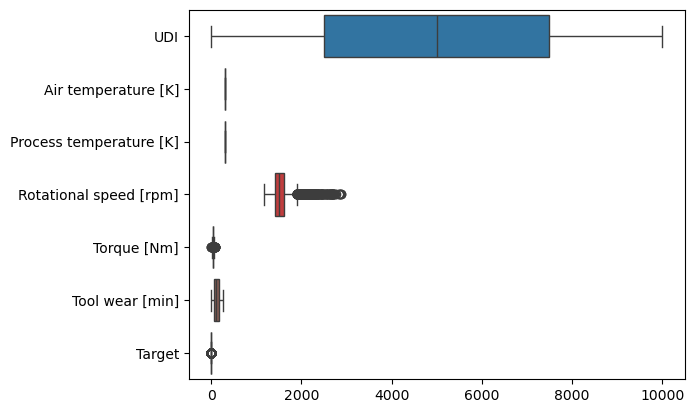

<Figure size 1000x200 with 0 Axes>

In [44]:
sns.boxplot(data=df, orient="h")
plt.figure(figsize=(10,2))
plt.show()

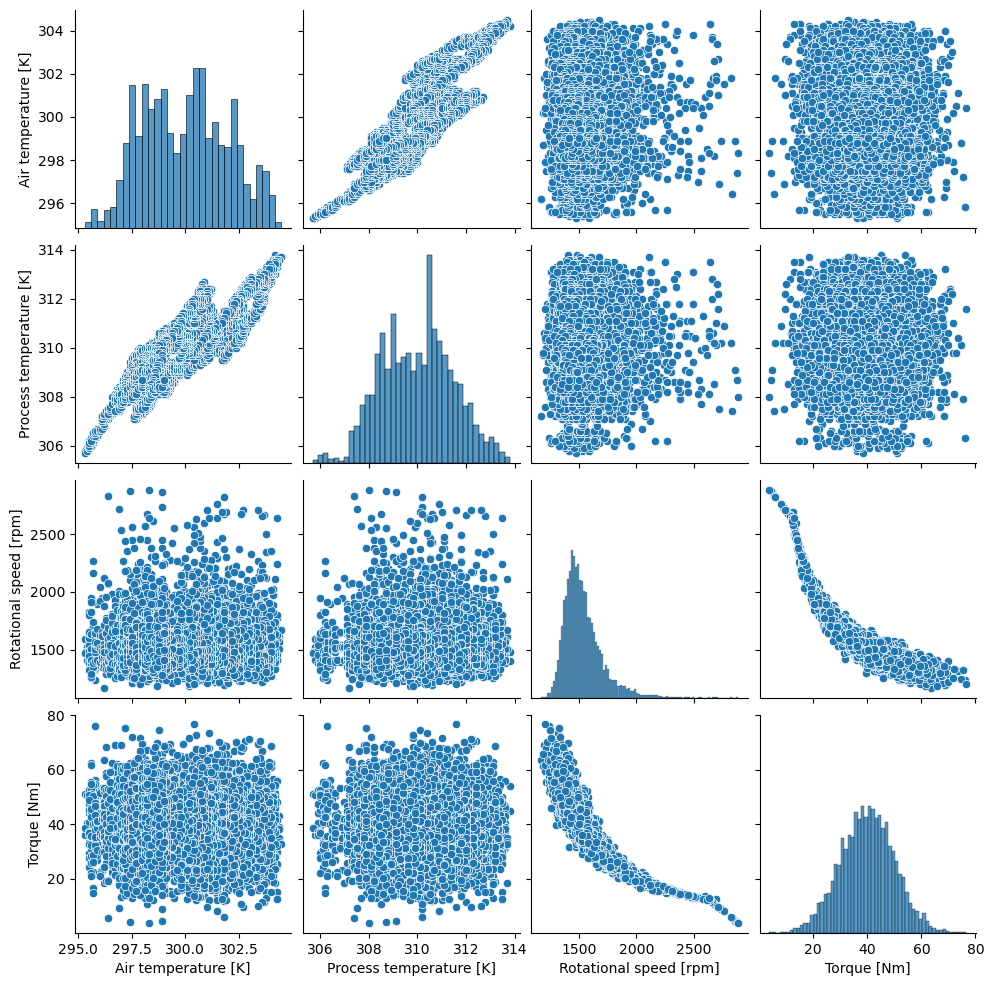

In [49]:
sns.pairplot(df[['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']])
plt.show()

# Feature Engineering

In [54]:
df = df[["Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]","Target"]]

# Model Building

In [61]:
X = df.drop(columns="Target")
Y = df["Target"]

In [67]:
#Training data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [71]:
print(X_train.shape, X_test.shape, Y_train.shape,  Y_test.shape)

(8000, 5) (2000, 5) (8000,) (2000,)


In [73]:
Y_test

6252    0
4684    1
1731    0
4742    0
4521    0
       ..
6412    0
8285    0
7853    0
1095    1
6929    0
Name: Target, Length: 2000, dtype: int64

# Model selection Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [80]:
lr = LogisticRegression()

In [82]:
lr.fit(X_train, Y_train)

LogisticRegression()

In [84]:
y_pred = lr.predict(X_test)

In [86]:
#Measuring the Model Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [88]:
print("Accuracy Score", accuracy_score(y_pred, Y_test))
print("classification_report",  classification_report(y_pred, Y_test))
print("confusion_matrix", confusion_matrix(y_pred, Y_test))

Accuracy Score 0.9725
classification_report               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1974
           1       0.26      0.62      0.37        26

    accuracy                           0.97      2000
   macro avg       0.63      0.80      0.68      2000
weighted avg       0.99      0.97      0.98      2000

confusion_matrix [[1929   45]
 [  10   16]]


# Naive Bayes Model

In [94]:
from sklearn.naive_bayes import GaussianNB

In [96]:
gb = GaussianNB()

In [98]:
gb.fit(X_train, Y_train)

GaussianNB()

In [100]:
y_pred = gb.predict(X_test)

In [102]:
#Measuring the Model Accuracy
print("Accuracy Score", accuracy_score(y_pred, Y_test))
print("classification_report",  classification_report(y_pred, Y_test))
print("confusion_matrix", confusion_matrix(y_pred, Y_test))

Accuracy Score 0.9645
classification_report               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1964
           1       0.21      0.36      0.27        36

    accuracy                           0.96      2000
   macro avg       0.60      0.67      0.62      2000
weighted avg       0.97      0.96      0.97      2000

confusion_matrix [[1916   48]
 [  23   13]]


# Decision Tree Model

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
t = DecisionTreeClassifier()

In [111]:
t.fit(X_train, Y_train)

DecisionTreeClassifier()

In [113]:
y_pred = t.predict(X_test)

In [115]:
#Measuring the Model Accuracy
print("Accuracy Score", accuracy_score(y_pred, Y_test))
print("classification_report",  classification_report(y_pred, Y_test))
print("confusion_matrix", confusion_matrix(y_pred, Y_test))

Accuracy Score 0.98
classification_report               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1933
           1       0.72      0.66      0.69        67

    accuracy                           0.98      2000
   macro avg       0.85      0.82      0.84      2000
weighted avg       0.98      0.98      0.98      2000

confusion_matrix [[1916   17]
 [  23   44]]


# K-Nearest Neighbors KNN Model 

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [138]:
k = KNeighborsClassifier()

In [140]:
k.fit(X_test, Y_test)

KNeighborsClassifier()

In [142]:
y_pred = k.predict(X_test)

In [144]:
#Measuring the Model Accuracy
print("Accuracy Score", accuracy_score(y_pred, Y_test))
print("classification_report",  classification_report(y_pred, Y_test))
print("confusion_matrix", confusion_matrix(y_pred, Y_test))

Accuracy Score 0.9755
classification_report               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1986
           1       0.21      0.93      0.35        14

    accuracy                           0.98      2000
   macro avg       0.61      0.95      0.67      2000
weighted avg       0.99      0.98      0.98      2000

confusion_matrix [[1938   48]
 [   1   13]]


# Support Vector Machine SVM Model

In [149]:
from sklearn.svm import SVC

In [151]:
s = SVC()

In [153]:
s.fit(X_train, Y_train)

SVC()

In [155]:
y_pred = s.predict(X_test)

In [157]:
#Measuring the Model Accuracy
print("Accuracy Score", accuracy_score(y_pred, Y_test))
print("classification_report",  classification_report(y_pred, Y_test))
print("confusion_matrix", confusion_matrix(y_pred, Y_test))

Accuracy Score 0.9705
classification_report               precision    recall  f1-score   support

           0       1.00      0.97      0.99      1998
           1       0.03      1.00      0.06         2

    accuracy                           0.97      2000
   macro avg       0.52      0.99      0.52      2000
weighted avg       1.00      0.97      0.98      2000

confusion_matrix [[1939   59]
 [   0    2]]
